### Coarse bathymetry SVB - Domain 01 

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Domain 1 is bounded by

* north: 30.0 N 
* south: 27.5 N
* east: -116.5 W
* west -114.0 W

Other considerations
* Bottom depth flattened to -1000 m.
* Land set to 0 m.
* Erased some weird artifacts form the measurement tracks.
* With the deep hole in Ojo de Liebre lagoon
* Smoothed 

Grid
* Horizontal resolution: -0.015625 deg (~1.7 km, check!)
* nx=160, ny=160, nz=15, 
* Boundaries open to the N, W and S.

CLOSED BOUNDARIES
OPEN BOUNDRES

In [1]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [2]:
nc_file = '../../bathy/GEBCO_SVB/gebco_2020_n30.5_s26.8231201171875_w-116.5_e-113.7.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (882,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (672,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_para

In [3]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [4]:
for ii,loni in zip(range(len(lon)),lon):
    print(ii,loni)

0 -116.49791666666667
1 -116.49375
2 -116.48958333333334
3 -116.48541666666667
4 -116.48125
5 -116.47708333333333
6 -116.47291666666666
7 -116.46875
8 -116.46458333333334
9 -116.46041666666667
10 -116.45625000000001
11 -116.45208333333333
12 -116.44791666666666
13 -116.44375
14 -116.43958333333333
15 -116.43541666666667
16 -116.43125
17 -116.42708333333334
18 -116.42291666666667
19 -116.41875
20 -116.41458333333333
21 -116.41041666666666
22 -116.40625
23 -116.40208333333334
24 -116.39791666666667
25 -116.39375000000001
26 -116.38958333333333
27 -116.38541666666666
28 -116.38125
29 -116.37708333333333
30 -116.37291666666667
31 -116.36875
32 -116.36458333333334
33 -116.36041666666667
34 -116.35625
35 -116.35208333333333
36 -116.34791666666666
37 -116.34375
38 -116.33958333333334
39 -116.33541666666667
40 -116.33125000000001
41 -116.32708333333333
42 -116.32291666666666
43 -116.31875
44 -116.31458333333333
45 -116.31041666666667
46 -116.30625
47 -116.30208333333334
48 -116.29791666666667


In [5]:
## Set domain corners
lon1 = 0
lon2 = 599
lat1 = 162
lat2 = 762

## Flatten out bottom at 1000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -1000] = -1000

## Flatten out NE corner in the Gulf of California
elev[lat2-130:lat2+3, lon2-135:lon2+3] = 0


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


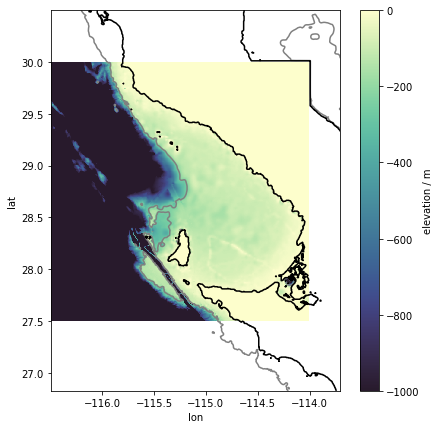

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -1000 m.  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [7]:
nx = 160
ny = 160 # 128, I want to see what is the right orientation

lon_vect = np.round(np.linspace(-116.497,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.5,30.0,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [8]:
bathy = f_interp(lon_vect,lat_vect)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


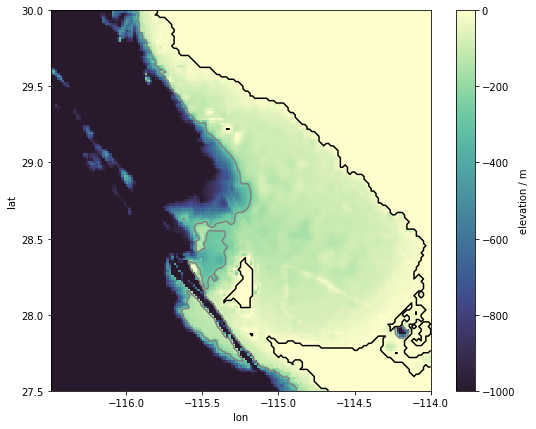

In [9]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [10]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [11]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
#smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


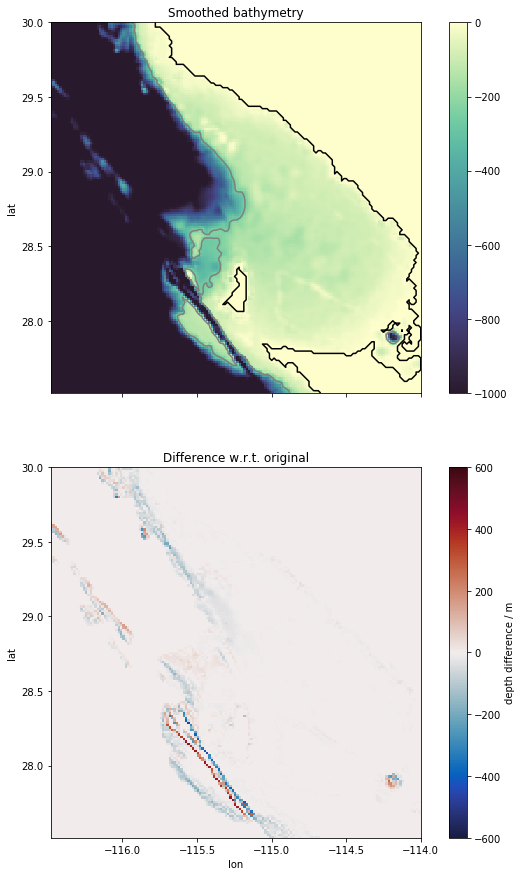

In [12]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Binary file

In [13]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [27]:
dy

array([0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01

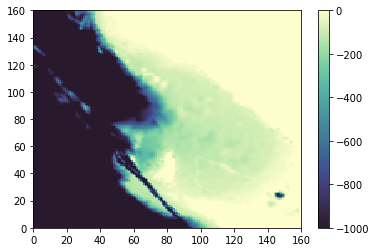

In [15]:
bathy_fname = '160x160/coarse_domain1_SVB_Eclosed_bat.bin'
dx_fname = '160x160/coarse_domain1_SVB_dx.bin'
dy_fname = '160x160/coarse_domain1_SVB_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=smooth_bathy
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.show()

#### Check that bin file works when read by fortran

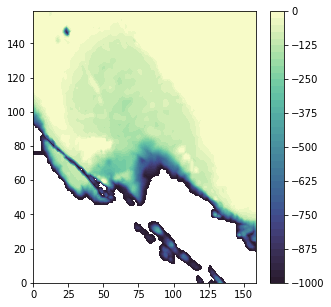

In [16]:
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
plt.colorbar(pc,ax=ax)


In [26]:
bF[:,-1]

array([-1000.        , -1000.        , -1000.        , -1000.        ,
       -1000.        , -1000.        , -1000.        , -1000.        ,
       -1000.        , -1000.        , -1000.        , -1000.        ,
       -1000.        , -1000.        , -1000.        , -1000.        ,
       -1000.        , -1000.        , -1000.        ,  -999.9678    ,
        -957.94875024,  -982.1939176 , -1000.        ,  -949.06      ,
        -851.76719248,  -640.27727712,  -638.1029464 ,  -678.78774992,
        -675.47509648,  -636.152808  ,  -644.17220448,  -572.375964  ,
        -487.72850656,  -401.29870976,  -299.8293616 ,  -243.99373968,
        -203.4154048 ,  -121.50862976,   -77.18642384,   -63.633388  ,
         -54.33051408,   -36.78480912,   -25.16688304,   -16.34544304,
          -3.6949    ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
      

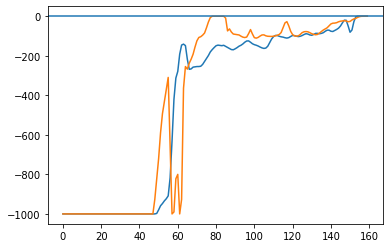

In [17]:
fig,ax = plt.subplots(1,1)
ax.plot(bF[:,66])
ax.plot(bF[:,43])

ax.axhline(0)

In [18]:
for ii in range(128):
    print(bF[-1,ii],ii)

0.0 0
0.0 1
0.0 2
0.0 3
0.0 4
0.0 5
0.0 6
0.0 7
0.0 8
0.0 9
0.0 10
0.0 11
0.0 12
0.0 13
0.0 14
0.0 15
0.0 16
0.0 17
0.0 18
0.0 19
0.0 20
0.0 21
0.0 22
0.0 23
0.0 24
0.0 25
0.0 26
0.0 27
0.0 28
0.0 29
0.0 30
0.0 31
0.0 32
0.0 33
0.0 34
0.0 35
0.0 36
0.0 37
0.0 38
0.0 39
0.0 40
0.0 41
0.0 42
0.0 43
0.0 44
0.0 45
0.0 46
0.0 47
0.0 48
0.0 49
0.0 50
0.0 51
0.0 52
0.0 53
0.0 54
0.0 55
0.0 56
0.0 57
0.0 58
0.0 59
0.0 60
0.0 61
0.0 62
0.0 63
0.0 64
0.0 65
0.0 66
0.0 67
0.0 68
0.0 69
0.0 70
0.0 71
0.0 72
0.0 73
0.0 74
0.0 75
0.0 76
0.0 77
0.0 78
0.0 79
0.0 80
0.0 81
0.0 82
0.0 83
0.0 84
0.0 85
0.0 86
0.0 87
0.0 88
0.0 89
0.0 90
0.0 91
0.0 92
0.0 93
0.0 94
0.0 95
0.0 96
0.0 97
0.0 98
0.0 99
0.0 100
0.0 101
0.0 102
0.0 103
0.0 104
0.0 105
0.0 106
0.0 107
0.0 108
0.0 109
0.0 110
0.0 111
0.0 112
0.0 113
0.0 114
0.0 115
0.0 116
0.0 117
0.0 118
0.0 119
0.0 120
0.0 121
0.0 122
0.0 123
0.0 124
0.0 125
0.0 126
0.0 127


In [1]:
(30.5-27)/0.01562

224.0717029449424